In [ ]:
# !python --version
# !D:/Jupyter/python.exe -m pip install --upgrade pip setuptools
# !pip install tensorflow
# !pip install --upgrade tensorflow

# !pip install numpy
# !pip install matplotlib
# !pip install keras
# !pip install pandas
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt



Python 3.12.7
  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-80.8.0-py3-none-any.whl.metadata (6.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
Using cached setuptools-80.8.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl (127 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)

  Attempting uninstall: ml-dtypes

    Found existing installation: ml_dtypes 0.5.1

    Uninstalling ml_dtypes-0.5.1:

      Successfully uninstalled ml_dtypes-0.5.1

  Attempting uninstall: tensorboard

    Found existing installation: tensorboard 2.19.0

   -------------------- ------------------- 1/2 [tensorboard]
    Uninstalling tensorboard-2.19.0:
   -------------------- ------------------- 1/2 [tensorboard]
      Successfully uninstalled tensorboard-2.19.0
   -------------------- ------------------- 1/2 [tensorboard]
   -------------------- ------------------- 1/2 [tensorboard]
   -------------------- ------------------- 1/2 [tensorboard]
   -------------------- ------------------- 1/2 [tensorboard]
   --------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Jupyter\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



# read the data file

In [5]:
import pandas  as pd #Data manipulation
df = pd.read_csv('../datasets/income.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')
df.head()


Number of rows and columns in the data set:  (498, 3)



,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


# Compute the input (as a tensor) which is the income

In [6]:
data_input = np.array([np.array([df['income'][i]]) for i in range(df.shape[0])])
data_input.shape

(498, 1)

# Compute the output which is the happiness level

In [7]:
data_output = np.array([df['happiness'][i] for i in range(df.shape[0])])
data_output

array([2.31448898, 3.43348976, 4.5993734 , 2.7911138 , 5.59639827,
       2.45855587, 3.19299181, 1.90713683, 2.94244987, 3.7379416 ,
       3.17540615, 2.00904646, 5.9518141 , 5.96054731, 1.44579886,
       2.89858314, 1.23116752, 2.31298805, 2.66611603, 2.58472902,
       5.7474441 , 2.54652459, 1.20078553, 3.07829338, 4.31776092,
       5.38147874, 3.56522432, 0.953413  , 2.16916126, 2.06079431,
       6.29910126, 1.59035586, 2.25092941, 5.9142477 , 2.1918337 ,
       5.76781437, 0.97288292, 5.01057743, 2.23966499, 1.92757883,
       3.35807157, 2.40008729, 3.40798004, 2.57617631, 2.47307938,
       3.75265949, 4.08763118, 3.54320365, 5.34835294, 3.05637665,
       1.55842256, 3.22513275, 5.03423101, 3.85742426, 3.61905549,
       4.00453774, 4.80209181, 4.65889039, 5.23170297, 2.48060647,
       5.49814719, 4.55063696, 3.57001357, 4.71966533, 4.50310817,
       5.04608177, 0.66971595, 1.60607236, 4.8266027 , 2.20824052,
       4.0564931 , 3.56790523, 1.30848726, 4.1596093 , 4.63391

# Train the model

In [8]:
def train_model(model,inputs,outputs):
  model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  # model.fit(inputs,outputs,epochs=1000)
  model.fit(inputs,outputs,epochs=1000)

# Define a function to build the model: the function returns the model which has a dense layer with 4 neuros and a sigmoid activation function

In [9]:
def build_model(data):
    # Create model
    model = keras.Sequential([
        layers.Dense(4, activation='sigmoid', input_shape=(data.shape[1],)),
        layers.Dense(1)
    ])
    
    return model


# Now build the model

In [10]:
model = build_model(data_input)
model.summary()

D:\Jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [11]:
train_model(model,data_input,data_output)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 15.9495 - mae: 3.7107
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4228 - mae: 3.4930 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.0269 - mae: 3.4291 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.4029 - mae: 3.3578 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5528 - mae: 3.2340 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1373 - mae: 3.1740 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6288 - mae: 3.0698 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4234 - mae: 3.0303 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5878 - mae: 2.9143
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1072 - mae: 2.8343
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0149 - mae: 2.7993
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4375 - mae: 2.7072 
Epoch 

# These two functions are used to plot the model predictions

In [12]:
def plot_data(model,inputs,outputs,low,high):
    x = np.linspace(low,high,20)
    y = model.predict(x)
    plt.scatter(inputs,outputs)
    plt.scatter(x,y)

def plot_data_line(model,inputs,outputs,low,high):
    x = np.linspace(low,high,20)
    y = model.predict(x)
    plt.scatter(inputs,outputs)
    plt.plot(x,y,"-r")

# Now plot the results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


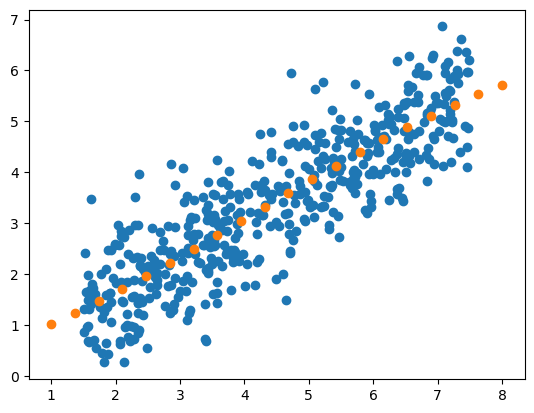

In [13]:
plot_data(model,data_input,data_output,1,8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


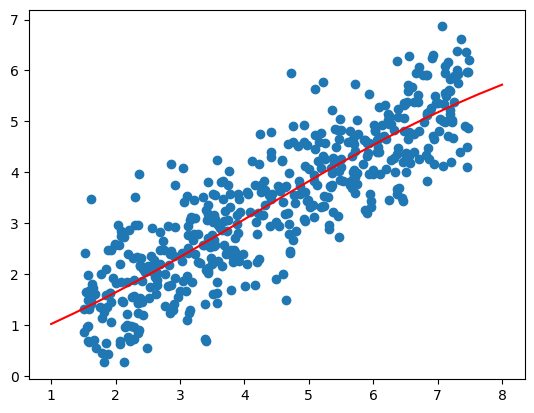

In [14]:
plot_data_line(model,data_input,data_output,1,8)